In [1]:
using NetCDF, AvailablePotentialEnergyFramework, Statistics, LaTeXStrings, Unitful, JLD, CairoMakie, Tullio, LoopVectorization

┌ Info: Precompiling NetCDF [30363a11-5582-574a-97bb-aa9a979735b9]
└ @ Base loading.jl:1423
┌ Info: Precompiling AvailablePotentialEnergyFramework [ce1b76f3-601c-5192-adf8-a07e935792b9]
└ @ Base loading.jl:1423
┌ Info: Precompiling JLD [4138dd39-2aa7-5051-a626-17a0bb65d9c8]
└ @ Base loading.jl:1423
┌ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
└ @ Base loading.jl:1423
┌ Warning: unknown command \Join
└ @ MathTeXEngine ~/.julia/packages/MathTeXEngine/ZP0gS/src/parser/commands_registration.jl:48


formula for PI:
    
$\epsilon = (T_s - T_{out}) / Tout$
   
$v^2 = \frac{C_k}{C_d}  \epsilon  T_s(K^{*}_s - k_b)$ where k is specific enthalpy
   

In [2]:
data_dir = "/global/cscratch1/sd/aramreye/for_postprocessing/MECFeedback/CompositeOutputs_50d_9hpa/"
plots_dir = "/global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld/plotsandanimations/"
large_data_dir = "$(ENV["SCRATCH"])/for_postprocessing/largencfiles/"

"/global/cscratch1/sd/aramreye/for_postprocessing/largencfiles/"

In [3]:
nudging_time_list                 = ["5e-1h", "1h", "2h", "3h", "5h", "8h", "5e-1day", "1day", "2day", "5day", "10day",  "15day"]
experiment_labels_for_file = "τ = " .* ["½h", "1h", "2h", "3h", "5h", "8h", "12h", "1d", "2d","5day", "10d",  "15d"];
experiment_labels_for_plot = "τᵣ = " .* ["½h", "1h", "2h", "3h", "5h", "8h", "12h", "1d", "2d","5day", "10d",  "15d"];
push!(experiment_labels_for_plot, "Control");
push!(experiment_labels_for_file, "No nudging");

In [4]:
file_list_2d = string.("f5e-4_2km_1000km_homoRad_homoSfc_nudgeClearsky_",nudging_time_list,"_2d.nc")
push!(file_list_2d,"f5e-4_2km_1000km_homoRad_homoSfc_2d.nc")
file_list_3d = string.("f5e-4_2km_1000km_homoRad_homoSfc_nudgeClearsky_",nudging_time_list,"_3d.nc")
push!(file_list_3d,"f5e-4_2km_1000km_homoRad_homoSfc_3d.nc");

In [5]:
z_grd = [50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 1050 1178.57142857143 1385.71428571429 1671.42857142857 2035.71428571429 2478.57142857143 3000 3600 4200 4800 5400 6000 6600 7200 7800 8400 9000 9600 10200 10800 11400 12000 12600 13200 13800 14400 15000 15600 16200 16800 17400 18000 18600 19200 19800 20400 21000 21600 22200 22800 23400 24000 24600 25200 25800 26400 27000 27600 28200 28800 29400 30000 30600 31200 31800 32400 33000 33600 34200 34800];
x = 1e-3collect(range(0,step=2000,length=255))
y = x
z_iter = 3:56;
x_iter = 2:100

2:100

In [2]:
# using Distributed; addprocs();

In [9]:
# @everywhere begin
#     import Pkg
#     Pkg.activate("../../");
# end;

      From worker 4:	  Activating project at `/global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld`
      From worker 56:	  Activating project at `/global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld`
      From worker 23:	  Activating project at `/global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld`
      From worker 46:	  Activating project at `/global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld`
      From worker 54:	  Activating project at `/global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld`
      From worker 62:	  Activating project at `/global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld`
      From worker 34:	  Activating project at `/global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld`
      From worker 59:	  Activating project at `/global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld`
      From worker 21:	  Activating project at `/global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld`
      From worker 65:	  Activating project at `/global/u2/a/aramr

  Activating project at `/global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld`


In [10]:
# @everywhere using NetCDF, AvailablePotentialEnergyFramework, Statistics, LaTeXStrings, Unitful, JLD, CairoMakie, Tullio, LoopVectorization

In [18]:
# @everywhere function get_mean_vertical_profiles(file_path, var)
#     profile = NetCDF.open(file_path) do f
#         wholevar = f[var]
#         mean(wholevar,dims=(1,2))
#     end
# end

In [19]:
# mean_vertical_profiles_p = pmap(file -> get_mean_vertical_profiles(joinpath(large_data_dir,file),"PP") , file_list_3d)

13-element Vector{Array{Float32, 4}}:
 [-2.9548246f-5;;; -0.011862396;;; -0.02082405;;; … ;;; 0.00012588949;;; 0.00010639564;;; 0.00010136927;;;; -3.8665486f-5;;; -0.011186479;;; -0.020416878;;; … ;;; -3.4548935f-5;;; -2.5697034f-5;;; -2.3344563f-5;;;; -1.4385034f-5;;; -0.013867607;;; -0.026497614;;; … ;;; -1.4547021f-5;;; -2.2688906f-5;;; -1.0744847f-5;;;; … ;;;; -0.0006146431;;; -0.013171196;;; -0.027313232;;; … ;;; 0.0070409025;;; 0.0064354506;;; 0.0058566136;;;; -0.00045347214;;; -0.01293087;;; -0.026848793;;; … ;;; 0.006915229;;; 0.006322089;;; 0.005754539;;;; -0.0010194778;;; -0.013692856;;; -0.027825356;;; … ;;; 0.006864851;;; 0.0062776245;;; 0.005714995]
 [-3.282848f-5;;; -0.012161804;;; -0.021641655;;; … ;;; 0.00013058174;;; 0.00011067019;;; 0.00010528882;;;; -3.1069038f-5;;; -0.010553418;;; -0.01925241;;; … ;;; -1.6883258f-5;;; -7.6193746f-6;;; -6.92713f-6;;;; -2.1395856f-5;;; -0.014544557;;; -0.027495947;;; … ;;; 1.565367f-5;;; 1.7950018f-5;;; 3.7476275f-5;;;; … ;;;; -0.0040

In [20]:
# mean_vertical_profiles_qv = pmap(file -> get_mean_vertical_profiles(joinpath(large_data_dir,file),"QV") , file_list_3d)

13-element Vector{Array{Float32, 4}}:
 [10.971595;;; 10.682347;;; 10.587044;;; … ;;; 0.0;;; 0.0;;; 0.0;;;; 11.01791;;; 10.733501;;; 10.650898;;; … ;;; 0.0;;; 0.0;;; 0.0;;;; 11.027346;;; 10.750595;;; 10.659691;;; … ;;; 0.0;;; 0.0;;; 0.0;;;; … ;;;; 14.513773;;; 14.154057;;; 13.973535;;; … ;;; 6.5543296f-5;;; 5.915155f-5;;; 5.282124f-5;;;; 14.514339;;; 14.155092;;; 13.974892;;; … ;;; 6.5589455f-5;;; 5.924384f-5;;; 5.2823292f-5;;;; 14.50688;;; 14.149258;;; 13.971167;;; … ;;; 6.572134f-5;;; 5.925978f-5;;; 5.2859777f-5]
 [10.880209;;; 10.63302;;; 10.56562;;; … ;;; 0.0;;; 0.0;;; 0.0;;;; 10.879814;;; 10.625225;;; 10.561399;;; … ;;; 0.0;;; 0.0;;; 0.0;;;; 10.841862;;; 10.60618;;; 10.536364;;; … ;;; 0.0;;; 0.0;;; 0.0;;;; … ;;;; 14.869051;;; 14.499628;;; 14.325245;;; … ;;; 7.592628f-5;;; 7.240927f-5;;; 6.899561f-5;;;; 14.863281;;; 14.495045;;; 14.321734;;; … ;;; 7.6027565f-5;;; 7.259521f-5;;; 6.9095215f-5;;;; 14.84815;;; 14.480494;;; 14.308494;;; … ;;; 7.6146825f-5;;; 7.270353f-5;;; 6.9203525f-5]


In [ ]:
# mean_vertical_profiles_tabs = pmap(file -> get_mean_vertical_profiles(joinpath(large_data_dir,file),"TABS") , file_list_3d)

13-element Vector{Array{Float32, 4}}:
 [290.41916;;; 289.81757;;; 289.37485;;; … ;;; 232.41006;;; 233.07005;;; 233.72968;;;; 290.98486;;; 290.36493;;; 289.89645;;; … ;;; 232.32245;;; 232.98245;;; 233.64249;;;; 291.41705;;; 290.80017;;; 290.3133;;; … ;;; 232.2326;;; 232.89407;;; 233.5567;;;; … ;;;; 296.08966;;; 295.57635;;; 295.14264;;; … ;;; 227.0198;;; 227.39987;;; 227.77988;;;; 296.0904;;; 295.57663;;; 295.14334;;; … ;;; 227.02141;;; 227.40805;;; 227.79465;;;; 296.0833;;; 295.57224;;; 295.1409;;; … ;;; 227.02303;;; 227.41632;;; 227.80957]
 [290.42163;;; 289.81927;;; 289.37494;;; … ;;; 232.41006;;; 233.07005;;; 233.72968;;;; 290.99786;;; 290.37738;;; 289.90717;;; … ;;; 232.32236;;; 232.98245;;; 233.64249;;;; 291.4145;;; 290.7995;;; 290.3063;;; … ;;; 232.23157;;; 232.89374;;; 233.55692;;;; … ;;;; 296.43448;;; 295.9142;;; 295.47687;;; … ;;; 227.38147;;; 227.75009;;; 228.11864;;;; 296.4198;;; 295.9021;;; 295.46753;;; … ;;; 227.38364;;; 227.76051;;; 228.13728;;;; 296.40955;;; 295.89484;;;

In [38]:
# mean_vertical_profiles_p_reshaped = cat((profile[1,1,:,:] for profile in mean_vertical_profiles_p)..., dims=3)
# mean_vertical_profiles_tabs_reshaped = cat((profile[1,1,:,:] for profile in mean_vertical_profiles_tabs)..., dims=3)
# mean_vertical_profiles_qv_reshaped = 1f-3 .* cat((profile[1,1,:,:] for profile in mean_vertical_profiles_qv)..., dims=3);

In [36]:
# p0 = NetCDF.open(joinpath(large_data_dir,file_list_3d[1])) do f
#         wholevar = f["p"][:]
# end;

In [42]:
# total_pres = reshape(p0,80,1,1) .+ 1f-2 .* (mean_vertical_profiles_p_reshaped);

In [45]:
# save("$(ENV["SCRATCH"])/meanprofiles.jld", "p0", p0, "mean_vertical_profiles_p", total_pres, "mean_vertical_profiles_tabs", mean_vertical_profiles_tabs_reshaped, "mean_vertical_profiles_qv", mean_vertical_profiles_qv_reshaped)

In [48]:
# mean_vertical_profiles_p = total_pres
# mean_vertical_profiles_tabs = mean_vertical_profiles_tabs_reshaped
# mean_vertical_profiles_qv = mean_vertical_profiles_qv_reshaped;

In [6]:
f = load("$(ENV["SCRATCH"])/meanprofiles.jld")
mean_vertical_profiles_p = f["mean_vertical_profiles_p"] # hPa
mean_vertical_profiles_qv = f["mean_vertical_profiles_qv"] #kg/kg 
mean_vertical_profiles_tabs = f["mean_vertical_profiles_tabs"] #K
p0 = f["p0"];

In [7]:
mean_vertical_profiles_p_last40days = dropdims(mean(mean_vertical_profiles_p[:,721:1200,:], dims=2), dims=2) # hPa
mean_vertical_profiles_qv_last40days = dropdims(mean(mean_vertical_profiles_qv[:,721:1200,:], dims=2), dims=2) #kg/kg 
mean_vertical_profiles_tabs_last40days = dropdims(mean(mean_vertical_profiles_tabs[:,721:1200,:], dims=2), dims=2) #K;

In [8]:
set_theme!(fontsize=20,
    Axis = (
        xminorticksvisible = true,
        yminorticksvisible = false,
        xminorgridvisible = true,
        yminorgridvisible = false,
        xticks = LinearTicks(6),
        xminorticks = IntervalsBetween(4)),
    Scatter = (cycle = [:color, :marker],),
    Lines = (cycle = [:color, :linestyle], linewidth = 3.0f0)
)
subplot_label_fontsize = 30.0f0
axis_label_fontsize = 30.0f0
linewidth = 1.5f0
legend_labelsize = 30.0f0

30.0f0

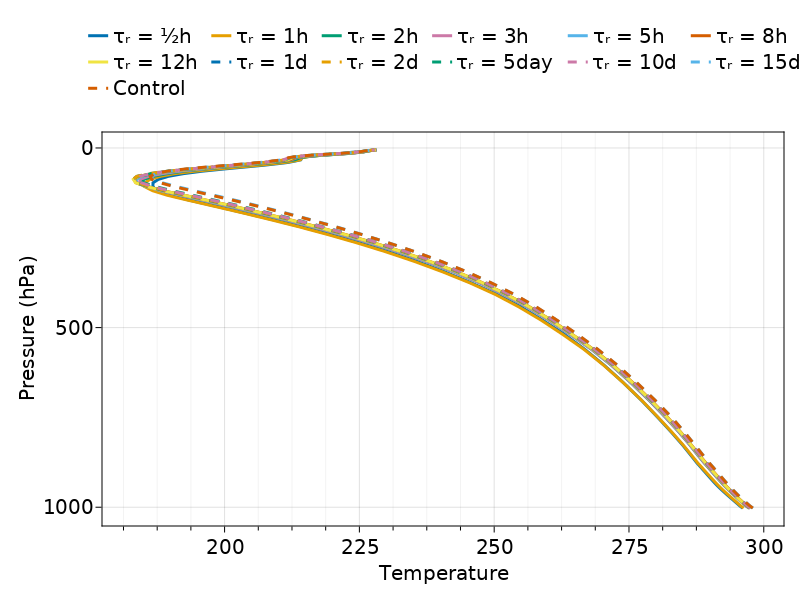

In [9]:
fig = Figure()
ax1 = Axis(fig[2,1], xlabel = "Temperature", ylabel = "Pressure (hPa)")
for ind in 1:13
    lines!(ax1,mean_vertical_profiles_tabs_last40days[:,ind], p0,label = experiment_labels_for_plot[ind])
end
ax1.yreversed = true
Legend(fig[1,:], ax1, framevisible = false, nbanks = 6, tellheight = true, tellwidth = false)
fig

In [10]:
include(joinpath(@__DIR__,"../../","EmanuelPotentialIntensity","emanuel_potential_intensity_wrapper.jl"))

get_cape (generic function with 1 method)

In [11]:

function get_cape_and_outflow_temp(i)
    tparcel = 300f0
    pparcel = mean_vertical_profiles_p_last40days[1,i]
    rparcel = specific_humidity_to_mixing_ratio(mean_vertical_profiles_qv_last40days[1,i])
    t = mean_vertical_profiles_tabs_last40days[:,i] 
    r = specific_humidity_to_mixing_ratio.(mean_vertical_profiles_qv_last40days[:,i])
    p = mean_vertical_profiles_p_last40days[:,i]
    get_cape(tparcel,rparcel,pparcel,t,r,p) 
end
capes_touts = [get_cape_and_outflow_temp(i) for i in 1:13]

13-element Vector{Tuple{Float32, Float32}}:
 (2811.2517, 188.17273)
 (3060.8245, 186.6254)
 (2983.003, 187.6295)
 (2956.3406, 187.40842)
 (2896.6433, 187.27519)
 (2835.6138, 187.50244)
 (2772.549, 187.66147)
 (2674.0369, 188.22644)
 (2607.9297, 188.82327)
 (2493.731, 191.9182)
 (2496.4224, 190.65462)
 (2217.1191, 202.76402)
 (2196.153, 201.5402)

In [12]:
function get_pmin_pi(i)
    sst = 300f0 - 273f0
    psl = mean_vertical_profiles_p_last40days[1,i]
    t = mean_vertical_profiles_tabs_last40days[:,i] .- 273f0
    r = 1f3 .* specific_humidity_to_mixing_ratio.(mean_vertical_profiles_qv_last40days[:,i])
    p = mean_vertical_profiles_p_last40days[:,i]
    get_pcmin(sst, psl, p,t,r)
end
pmins_pi = [get_pmin_pi(i) for i in 1:13]

13-element Vector{Tuple{Float32, Float32}}:
 (847.0205, 88.104515)
 (845.39557, 88.05904)
 (870.191, 79.17795)
 (868.683, 79.52332)
 (869.8868, 78.89011)
 (871.1435, 78.393456)
 (868.64014, 79.306114)
 (869.46735, 79.13474)
 (870.8204, 78.79977)
 (878.73315, 76.77441)
 (875.5332, 77.623405)
 (907.8672, 68.74759)
 (904.41223, 69.72274)

In [17]:
set_theme!(fontsize=30,
    Axis = (
        xminorticksvisible = false,
        yminorticksvisible = false,
        xminorgridvisible = false,
        yminorgridvisible = false,
        xgridvisible = true,
        ygridvisible = true,
        xticks = LinearTicks(6),
        xminorticks = IntervalsBetween(4)),
    Scatter = (cycle = Cycle([:color, :marker], covary = true),markersize = 20),
    Lines = (cycle = Cycle([:color , :linestyle], covary = false), linewidth = 3.0f0)
)
subplot_label_fontsize = 30.0f0
axis_label_fontsize = 30.0f0
linewidth = 1.5f0
legend_labelsize = 30.0f0

30.0f0

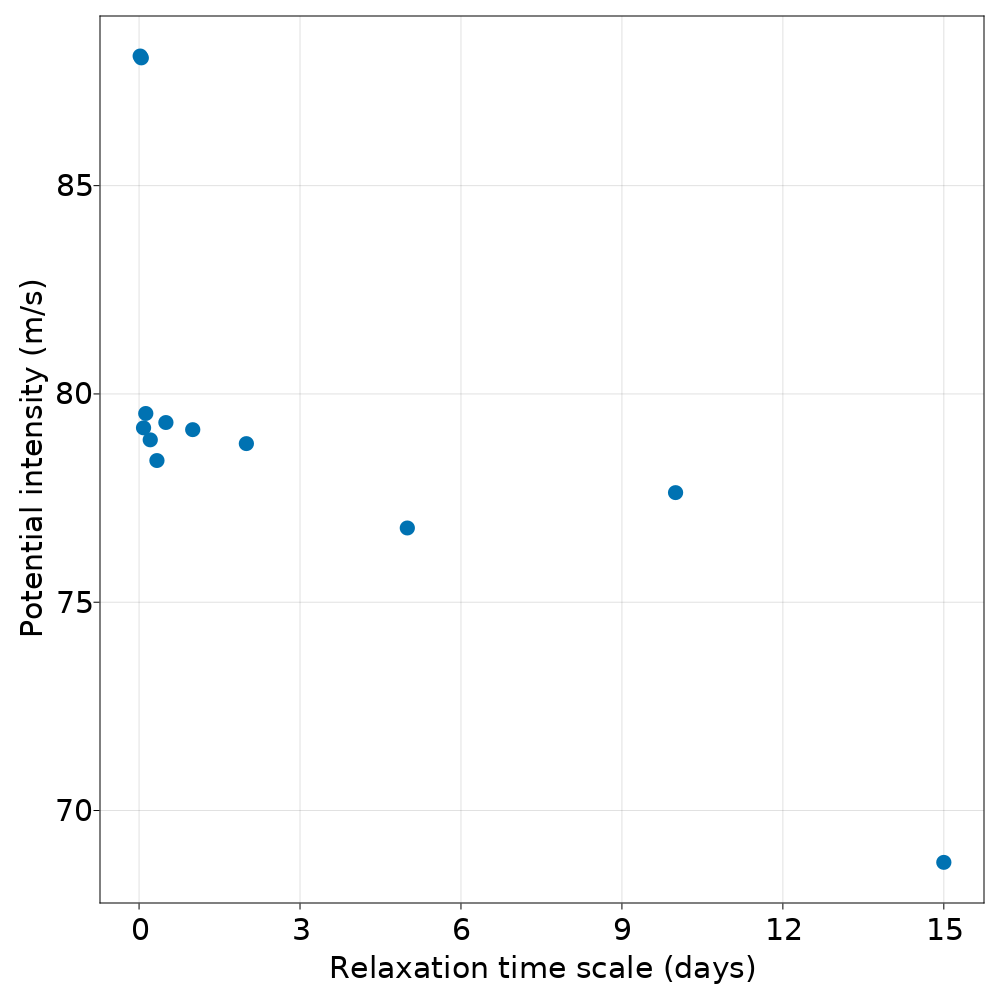

In [20]:
fig = Figure(resolution = (1000,1000))
ax1 = Axis(fig[1,1], xlabel="Relaxation time scale (days)", ylabel = "Potential intensity (m/s)")
scatter!(ax1,[1/48, 1/24, 1/12, 3/24, 5/24, 0.333, 0.5, 1, 2, 5, 10,  15],[pmin_pi[2] for pmin_pi in pmins_pi][1:12])
fig

In [21]:
plot_name = "potential_intensity"
save(joinpath(plots_dir,plot_name*".png"), fig,px_per_unit=4)
save(joinpath(plots_dir,plot_name*".eps"), fig)
save(joinpath(plots_dir,plot_name*".pdf"), fig)

CairoScreen{Cairo.CairoSurfaceIOStream{UInt32}} with surface:
Cairo.CairoSurfaceIOStream{UInt32}(Ptr{Nothing} @0x000000000dc9fb20, 750.0, 750.0, IOContext(IOStream(<file /global/u2/a/aramreye/RamirezReyes_MECFeedbackInTCWorld/plotsandanimations/potential_intensity.pdf>)))
